# Working with Data

In [18]:
import os
import pandas as pd
import numpy as np
import re
import pylab as pl

%pylab inline
#PUIdata = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['unique']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?


# 2. Think about what data are available

In [19]:
#Server is down so I used a small dataset 
#data = pd.read_csv('https://data.cityofnewyork.us/resource/erm2-nwe9.csv')

#Fixed server so I am runing it with the large dataset
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
data.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc.

In [21]:
# Check if all Boroughs and Community Districts are represented in the Data 
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [22]:
data['Borough'].unique()

array(['BROOKLYN', 'Unspecified', 'STATEN ISLAND', 'MANHATTAN', 'BRONX',
       'QUEENS'], dtype=object)

In [23]:
data['Community Board'].unique()

array(['13 BROOKLYN', '0 Unspecified', '18 BROOKLYN', '12 BROOKLYN',
       '02 STATEN ISLAND', '08 MANHATTAN', '06 BROOKLYN', '10 BRONX',
       '06 MANHATTAN', '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN',
       '14 BROOKLYN', '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS',
       '07 QUEENS', '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN',
       '09 QUEENS', '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN',
       '03 BRONX', '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN',
       '07 MANHATTAN', '10 MANHATTAN', '04 BRONX', '01 MANHATTAN',
       '07 BRONX', '09 BRONX', '03 MANHATTAN', '13 QUEENS', '02 BRONX',
       '12 QUEENS', '16 BROOKLYN', '08 QUEENS', '04 MANHATTAN',
       '14 QUEENS', '10 BROOKLYN', '11 QUEENS', '06 BRONX', '08 BRONX',
       '05 BRONX', '15 BROOKLYN', '02 BROOKLYN', '12 BRONX', '03 QUEENS',
       '06 QUEENS', '01 STATEN ISLAND', '01 BRONX', '01 QUEENS',
       '17 BROOKLYN', '11 BRONX', 'Unspecified QUEENS', '09 BROOKLYN',
       'Unspecified MANHATTAN'

In [24]:
sorted(data['Community Board'].unique())

['0 Unspecified',
 '01 BRONX',
 '01 BROOKLYN',
 '01 MANHATTAN',
 '01 QUEENS',
 '01 STATEN ISLAND',
 '02 BRONX',
 '02 BROOKLYN',
 '02 MANHATTAN',
 '02 QUEENS',
 '02 STATEN ISLAND',
 '03 BRONX',
 '03 BROOKLYN',
 '03 MANHATTAN',
 '03 QUEENS',
 '03 STATEN ISLAND',
 '04 BRONX',
 '04 BROOKLYN',
 '04 MANHATTAN',
 '04 QUEENS',
 '05 BRONX',
 '05 BROOKLYN',
 '05 MANHATTAN',
 '05 QUEENS',
 '06 BRONX',
 '06 BROOKLYN',
 '06 MANHATTAN',
 '06 QUEENS',
 '07 BRONX',
 '07 BROOKLYN',
 '07 MANHATTAN',
 '07 QUEENS',
 '08 BRONX',
 '08 BROOKLYN',
 '08 MANHATTAN',
 '08 QUEENS',
 '09 BRONX',
 '09 BROOKLYN',
 '09 MANHATTAN',
 '09 QUEENS',
 '10 BRONX',
 '10 BROOKLYN',
 '10 MANHATTAN',
 '10 QUEENS',
 '11 BRONX',
 '11 BROOKLYN',
 '11 MANHATTAN',
 '11 QUEENS',
 '12 BRONX',
 '12 BROOKLYN',
 '12 MANHATTAN',
 '12 QUEENS',
 '13 BROOKLYN',
 '13 QUEENS',
 '14 BROOKLYN',
 '14 QUEENS',
 '15 BROOKLYN',
 '16 BROOKLYN',
 '17 BROOKLYN',
 '18 BROOKLYN',
 '26 BRONX',
 '27 BRONX',
 '28 BRONX',
 '55 BROOKLYN',
 '56 BROOKLYN',
 '64

In [25]:
# How many unique values do we have? 
unique = len(data['Community Board'].unique())
print("We have {} unique community boards.".format(unique))

We have 77 unique community boards.


In [26]:
# Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. 
# We should have 59 Community Districts.
unspecified = data['Community Board'].str.contains('Unspecified|26|27|28|55|56|64|80|81|82|83|84|95').sum()

Total = len(data)
ratio = unspecified / Total
   
print("The ratio of unspecified community board from the total is %.2f" % ratio)


The ratio of unspecified community board from the total is 0.20


In [27]:
data_u = data[data['Community Board'].str.contains('Unspecified|26|27|28|55|56|64|80|81|82|83|84|95')]

Total_u = len(data_u['Community Board'].unique())
print("Total unspecified community board is {}.".format(Total_u))
print("Total number of community board is {}.".format(unique - Total_u))



Total unspecified community board is 18.
Total number of community board is 59.


In [29]:
data[data['Unique Key'].duplicated()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
4248298,26003579,07/26/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10302,131 HARRISON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636835,-74.138796,"(40.63683487948972, -74.13879629882382)"
4253082,26020434,07/25/2013 12:00:00 AM,08/05/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10462,1909 BARNES AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848845,-73.863631,"(40.8488451919449, -73.86363125763393)"
4253086,26012011,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11225,440 BROOKLYN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664148,-73.945482,"(40.66414769632634, -73.94548172836168)"
4253091,26002968,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,11237,406 SUYDAM STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.705703,-73.920175,"(40.705702500630075, -73.92017516512333)"
4253092,26020332,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11213,780 ST MARKS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675023,-73.946814,"(40.67502312706964, -73.94681393618372)"
4253095,26033513,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10302,60 AVENUE B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636351,-74.129806,"(40.63635131789832, -74.12980576711388)"
4253097,26011524,07/25/2013 12:00:00 AM,08/02/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10031,1484 AMSTERDAM AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.817860,-73.953008,"(40.817859804380014, -73.95300779968848)"
4253098,26011777,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11221,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.691219,-73.939679,"(40.6912192567118, -73.93967921077531)"
4253100,26011611,07/25/2013 12:00:00 AM,08/02/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467,2309 HOLLAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.859953,-73.865586,"(40.85995256353461, -73.86558595844559)"
4253101,26028900,07/25/2013 12:00:00 AM,08/06/2013 10:54:57 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10302,22 JEWETT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636904,-74.128820,"(40.63690412970023, -74.12881960785445)"


In [30]:
# Check for duplicates? Are these plausible?
data_d = data.drop_duplicates(subset = 'Unique Key')
Total_d = len(data_d)
ratio_d = Total_d / Total
print("The ratio of unduplicate unique key from the total is %.2f" % ratio_d)


The ratio of unduplicate unique key from the total is 1.00


In [31]:
# What about missing values? Can you detect any patterns?
data_d.isnull().sum()

Unique Key                               0
Created Date                             0
Closed Date                         450879
Agency                                   0
Agency Name                              0
Complaint Type                           0
Descriptor                           31057
Location Type                      3067596
Incident Zip                        794159
Incident Address                   2197705
Street Name                        2198558
Cross Street 1                     2375942
Cross Street 2                     2425792
Intersection Street 1              8345267
Intersection Street 2              8346281
Address Type                        490299
City                                788712
Landmark                          10180434
Facility Type                      8579463
Status                                   0
Due Date                           7120286
Resolution Description             3786739
Resolution Action Updated Date      250932
Community B

In [32]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?
data_d['Resolution Description'].fillna(data_d['Complaint Type'],inplace = 1)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
# What about missing values? Can you detect any patterns? 
data_d['Resolution Description'].isnull().sum()

0

In [34]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 
data_d['marker'] = data_d['Community Board'].str.contains('Unspecified|26|27|28|55|56|64|80|81|82|83|84|95')


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [35]:
# Drop the marked districts
data_2 = data_d[data_d['marker'] == False]

In [36]:
data_2.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,marker
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)",False
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)",False
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)",False
5,31914148,11/05/2015 01:55:55 AM,NaN,DOT,Department of Transportation,Highway Condition,Pothole - Highway,Highway,10304,NaN,...,East/Brooklyn Bound,Roadway,Clove Rd/Richmond Rd (Exit 13) - Lily Pond Ave...,NaN,NaN,NaN,40.606875,-74.085408,"(40.60687536641399, -74.0854077221027)",False
7,31912611,11/05/2015 01:47:12 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10021,1402 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.769379,-73.957930,"(40.769378795761845, -73.95793023233308)",False


In [37]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level
data_3 = data_2['Complaint Type'].groupby(data_2['Community Board']).count()

In [38]:
# Safe reduced data frame (Community District level)
complaint = pd.DataFrame(data_3)
complaint.rename(columns={'Complaint Type': 'Complaint Count'}, inplace=True)
del complaint.index.name
complaint.sort(['Complaint Count'], ascending = 0)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Complaint Count
12 MANHATTAN,268053
12 QUEENS,229383
03 BROOKLYN,197305
07 QUEENS,195961
17 BROOKLYN,191720
05 BROOKLYN,189765
14 BROOKLYN,187792
07 BRONX,185729
01 BROOKLYN,185057
01 STATEN ISLAND,182708


# 4. Think about the interpretation of your results?

What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data.

In [39]:
# Population by Community District
df_pop = pd.read_csv('http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv')

In [40]:
df_pop.shape

(59, 158)

In [41]:
# Check variables in file
df_pop.head(5)

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [42]:
list(df_pop.columns)

['FIPS',
 'cd_id',
 'Total Population',
 'Population Density (per sq. mile)',
 '% Total Population: Male',
 '% Total Population: 18 to 24 Years',
 '% Total Population: 25 to 34 Years',
 '% Total Population: 35 to 44 Years',
 '% Population 5 Years And Over: Speak Only English',
 '% Population 5 Years And Over: Spanish or Spanish Creole',
 '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"',
 '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"',
 'Population 25 Years and over:',
 'Population 25 Years and over: Less Than High School',
 'Population 25 Years and over: High School Graduate (includes equivalency)',
 'Population 25 Years and over: Some college',
 "Population 25 Years and over: Bachelor's degree",
 "Population 25 Years and over: Master's degree",
 'Population 25 Years and over: Professional school degree',
 'Population 25 Years and over: Doctorate degree',
 '% Population 25 Years and over: Less Than Hi

In [43]:
#How many community districts are in file? 
len(df_pop['cd_id'].unique())

59

In [44]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
df_pop1 = df_pop[['cd_id', 'Population Density (per sq. mile)', 'Total Population', '% Total Population: Male',\
                   'Median household income (In 2014 Inflation Adjusted Dollars)']]

In [45]:
# Save data frame
pop = df_pop1
pop.head()

,cd_id,Population Density (per sq. mile),Total Population,% Total Population: Male,Median household income (In 2014 Inflation Adjusted Dollars)
0,BX08,31229.95006,106737,46.65,54224
1,BX12,19966.67839,134644,46.35,44906
2,BX10,12913.81703,121209,45.20,54962
3,BX11,35677.95453,135839,50.09,47910
4,BX03,39405.79222,172247,44.72,22041


In [46]:
# Infrastructure by Community District
df_infr = pd.read_csv('http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv')

In [47]:
df_infr.shape

(59, 31)

In [48]:
# Check variables in file
df_infr.head(5)

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [49]:
df_infr.columns

Index(['FIPS', 'Geographic Identifier', 'Qualifying Name', 'Households',
       'Households: With An Internet Subscription',
       'Households: Dial-Up Alone', 'Households: Dsl',
       'Households: With Mobile Broadband',
       'Households: Without Mobile Broadband', 'Households: Cable Modem',
       'Households: With Mobile Broadband.1',
       'Households: Without Mobile Broadband.1', 'Households: Fiber-Optic',
       'Households: With Mobile Broadband.2',
       'Households: Without Mobile Broadband.2',
       'Households: Satellite Internet Service',
       'Households: With Mobile Broadband.3',
       'Households: Without Mobile Broadband.3',
       'Households: Two or More Fixed Broadband Types, or Other',
       'Households: With Mobile Broadband.4',
       'Households: Without Mobile Broadband.4',
       'Households: Mobile Broadband Alone or With Dialup',
       'Households: Internet Access Without A Subscription',
       'Households: No Internet Access',
       '% Househol

In [50]:
# How many community districts are in file? 
len(df_infr['Qualifying Name'].unique())

55

In [51]:
df_infr_d = df_infr.drop_duplicates()
len(df_infr_d)

55

In [52]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data
df_infr_d['With Mobile Broadband'] = df_infr_d['Households: With Mobile Broadband'] + \
df_infr_d['Households: With Mobile Broadband.1'] + df_infr_d['Households: With Mobile Broadband.2'] + \
df_infr_d['Households: With Mobile Broadband.3'] + df_infr_d['Households: With Mobile Broadband.4'] + \
df_infr_d['Households: Mobile Broadband Alone or With Dialup']

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [53]:
df_infr_d['Without Mobile Broadband'] = df_infr_d['Households: Without Mobile Broadband'] + \
df_infr_d['Households: Without Mobile Broadband.1'] + df_infr_d['Households: Without Mobile Broadband.2'] + \
df_infr_d['Households: Without Mobile Broadband.2'] + df_infr_d['Households: Without Mobile Broadband.3'] + \
df_infr_d['Households: Without Mobile Broadband.4'] + df_infr_d['Households: Dial-Up Alone']

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
df_infr_d.head(5)

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,With Mobile Broadband,Without Mobile Broadband
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,8121,75.64,42035,35048,404,30943,3701,6987,17527,14774
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,10696,71.92,44830,36700,178,31435,5087,8130,11414,24687
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,11439,69.56,47050,38700,158,32333,6209,8350,12064,22955
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,10197,71.24,44922,37237,122,31278,5837,7685,11749,23417
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,18741,61.68,57556,42576,88,33408,9080,14980,16292,20026


In [55]:
# Aggregate internet type by high and low connections
df_infr_d['high connections'] = df_infr_d['Households: Dsl'] + \
df_infr_d['Households: Cable Modem'] + df_infr_d['Households: Fiber-Optic'] + \
df_infr_d['Households: Satellite Internet Service'] + \
df_infr_d['Households: Two or More Fixed Broadband Types, or Other']

    

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
df_infr_d['low connections'] = df_infr_d['Households: Dial-Up Alone'] + \
df_infr_d['Households: Mobile Broadband Alone or With Dialup'] + \
df_infr_d['Households: No Internet Access'] + df_infr_d['Households: Internet Access Without A Subscription'] 


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
df_infr_d.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,With Mobile Broadband,Without Mobile Broadband,high connections,low connections
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,42035,35048,404,30943,3701,6987,17527,14774,29183,12852
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,44830,36700,178,31435,5087,8130,11414,24687,31137,13693
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,47050,38700,158,32333,6209,8350,12064,22955,31932,15118
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,44922,37237,122,31278,5837,7685,11749,23417,30861,14061
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,57556,42576,88,33408,9080,14980,16292,20026,34030,23526


In [58]:
# Save data frame 
infr_1 = df_infr_d[['Qualifying Name', 'With Mobile Broadband', 'Without Mobile Broadband',\
                    'high connections', 'low connections']]

In [59]:
infr_1.head()

,Qualifying Name,With Mobile Broadband,Without Mobile Broadband,high connections,low connections
0,"NYC-Bronx Community District 8--Riverdale, New...",17527,14774,29183,12852
1,"NYC-Bronx Community District 12--Wakefield, Ne...",11414,24687,31137,13693
2,"NYC-Bronx Community District 10--Co-op City, N...",12064,22955,31932,15118
3,NYC-Bronx Community District 11--Pelham Parkwa...,11749,23417,30861,14061
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",16292,20026,34030,23526


# 5. Inform your results by linking datasets

Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc. https://docs.python.org/2/library/re.html

In [60]:
# Harmonize identifier of dataframe 1
complaint.reset_index(level=0, inplace=True)
complaint.rename(columns={'index': 'CM B'}, inplace=True)
complaint.head()

,CM B,Complaint Count
0,01 BRONX,74631
1,01 BROOKLYN,185057
2,01 MANHATTAN,77974
3,01 QUEENS,171484
4,01 STATEN ISLAND,182708


In [61]:
complaint['CM B'] = complaint['CM B'].str.replace('BRONX', 'BX')
complaint['CM B'] = complaint['CM B'].str.replace('MANHATTAN', 'MN')
complaint['CM B'] = complaint['CM B'].str.replace('BROOKLYN', 'BK')
complaint['CM B'] = complaint['CM B'].str.replace('QUEENS', 'QN')
complaint['CM B'] = complaint['CM B'].str.replace('STATEN ISLAND', 'SI')

complaint.head()

,CM B,Complaint Count
0,01 BX,74631
1,01 BK,185057
2,01 MN,77974
3,01 QN,171484
4,01 SI,182708


In [62]:
cm1 = complaint['CM B'].map(lambda x: str(x).split(' ')[0])
cm2 = complaint['CM B'].map(lambda x: str(x).split(' ')[1])
cm = cm2 + cm1

In [63]:
complaint_f = complaint
complaint_f['CM B'] = cm
complaint_f.head()

,CM B,Complaint Count
0,BX01,74631
1,BK01,185057
2,MN01,77974
3,QN01,171484
4,SI01,182708


In [64]:
# Harmonize identifier of dataframe 2
pop['cd_id']

0        BX08
1        BX12
2        BX10
3        BX11
4        BX03
5        BX06
6        BX07
7        BX05
8        BX04
9        BX09
10       BX01
11       BX02
12       MN12
13       MN09
14       MN10
15    MN11111
16       MN08
17       MN07
18       MN05
19       MN04
20       MN06
21       MN03
22       MN01
23       MN02
24       SI03
25       SI02
26       SI01
27       BK01
28       BK04
29       BK03
30       BK02
31       BK06
32       BK08
33       BK16
34       BK05
35       BK18
36       BK17
37       BK09
38       BK07
39       BK10
40       BK12
41       BK14
42       BK15
43       BK11
44       BK13
45       QN01
46       QN03
47       QN07
48       QN11
49       QN13
50       QN08
51       QN04
52       QN06
53       QN02
54       QN05
55       QN09
56       QN12
57       QN10
58       QN14
Name: cd_id, dtype: object

In [65]:
pop['cd_id'] = pop['cd_id'].str.replace('MN11111', 'MN11')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
pop['cd_id']

0     BX08
1     BX12
2     BX10
3     BX11
4     BX03
5     BX06
6     BX07
7     BX05
8     BX04
9     BX09
10    BX01
11    BX02
12    MN12
13    MN09
14    MN10
15    MN11
16    MN08
17    MN07
18    MN05
19    MN04
20    MN06
21    MN03
22    MN01
23    MN02
24    SI03
25    SI02
26    SI01
27    BK01
28    BK04
29    BK03
30    BK02
31    BK06
32    BK08
33    BK16
34    BK05
35    BK18
36    BK17
37    BK09
38    BK07
39    BK10
40    BK12
41    BK14
42    BK15
43    BK11
44    BK13
45    QN01
46    QN03
47    QN07
48    QN11
49    QN13
50    QN08
51    QN04
52    QN06
53    QN02
54    QN05
55    QN09
56    QN12
57    QN10
58    QN14
Name: cd_id, dtype: object

In [67]:
pop_f = pop
pop_f.rename(columns={'cd_id': 'CM B'}, inplace=True)
pop_f.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,CM B,Population Density (per sq. mile),Total Population,% Total Population: Male,Median household income (In 2014 Inflation Adjusted Dollars)
0,BX08,31229.95006,106737,46.65,54224
1,BX12,19966.67839,134644,46.35,44906
2,BX10,12913.81703,121209,45.20,54962
3,BX11,35677.95453,135839,50.09,47910
4,BX03,39405.79222,172247,44.72,22041


In [68]:
# Harmonize identifier of dataframe 3
infr_1.head()

,Qualifying Name,With Mobile Broadband,Without Mobile Broadband,high connections,low connections
0,"NYC-Bronx Community District 8--Riverdale, New...",17527,14774,29183,12852
1,"NYC-Bronx Community District 12--Wakefield, Ne...",11414,24687,31137,13693
2,"NYC-Bronx Community District 10--Co-op City, N...",12064,22955,31932,15118
3,NYC-Bronx Community District 11--Pelham Parkwa...,11749,23417,30861,14061
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",16292,20026,34030,23526


In [69]:
infr_1['Qualifying Name'] = infr_1['Qualifying Name'].str.replace('NYC-Bronx Community District', 'BX')
infr_1['Qualifying Name']  = infr_1['Qualifying Name'].str.replace('NYC-Manhattan Community District', 'MN')
infr_1['Qualifying Name']  = infr_1['Qualifying Name'].str.replace('NYC-Staten Island Community District', 'SI')
infr_1['Qualifying Name']  = infr_1['Qualifying Name'].str.replace('NYC-Brooklyn Community District', 'BK')
infr_1['Qualifying Name']  = infr_1['Qualifying Name'].str.replace('NYC-Queens Community District', 'QN')

infr_1.head()


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Qualifying Name,With Mobile Broadband,Without Mobile Broadband,high connections,low connections
0,"BX 8--Riverdale, New York",17527,14774,29183,12852
1,"BX 12--Wakefield, New York",11414,24687,31137,13693
2,"BX 10--Co-op City, New York",12064,22955,31932,15118
3,"BX 11--Pelham Parkway, New York",11749,23417,30861,14061
4,"BX 3 & 6--Belmont, New York",16292,20026,34030,23526


In [70]:
#infr_d['Qualifying Name'].map(lambda x: str(x)[2:])

test = infr_1['Qualifying Name'].map(lambda x: str(x).split('-')[0])
test_1 = test.map(lambda x: str(x).split(' ')[1])
test_2 = test.map(lambda x: str(x).split(' ')[0])
test_1 = test_1.str.zfill(2)
test = test_2 + test_1




In [71]:
infr_f = infr_1
infr_f['Qualifying Name'] = test
infr_f.rename(columns={'Qualifying Name': 'CM B'}, inplace=True)
infr_f.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,CM B,With Mobile Broadband,Without Mobile Broadband,high connections,low connections
0,BX08,17527,14774,29183,12852
1,BX12,11414,24687,31137,13693
2,BX10,12064,22955,31932,15118
3,BX11,11749,23417,30861,14061
4,BX03,16292,20026,34030,23526


In [72]:
# Link the 3 dataframes
final_1 = pd.merge(complaint_f, pop_f, how='inner', on =['CM B'])
final = pd.merge(final_1, infr_f, how='inner', on =['CM B'])
final.head()

,CM B,Complaint Count,Population Density (per sq. mile),Total Population,% Total Population: Male,Median household income (In 2014 Inflation Adjusted Dollars),With Mobile Broadband,Without Mobile Broadband,high connections,low connections
0,BX01,74631,34412.07524,167147,49.63,21116,15981,18082,31711,20480
1,BK01,185057,37671.51058,154713,49.93,57818,21459,28172,44621,18369
2,MN01,77974,53928.05360,159903,49.00,120190,41450,37427,72767,11209
3,QN01,171484,35800.75960,182860,49.32,56269,31144,31949,60125,15633
4,SI01,182708,12537.60496,176338,49.29,57602,11151,53345,46304,15743


In [73]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?

In [74]:
final = final.sort(['Complaint Count'], ascending = 0)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


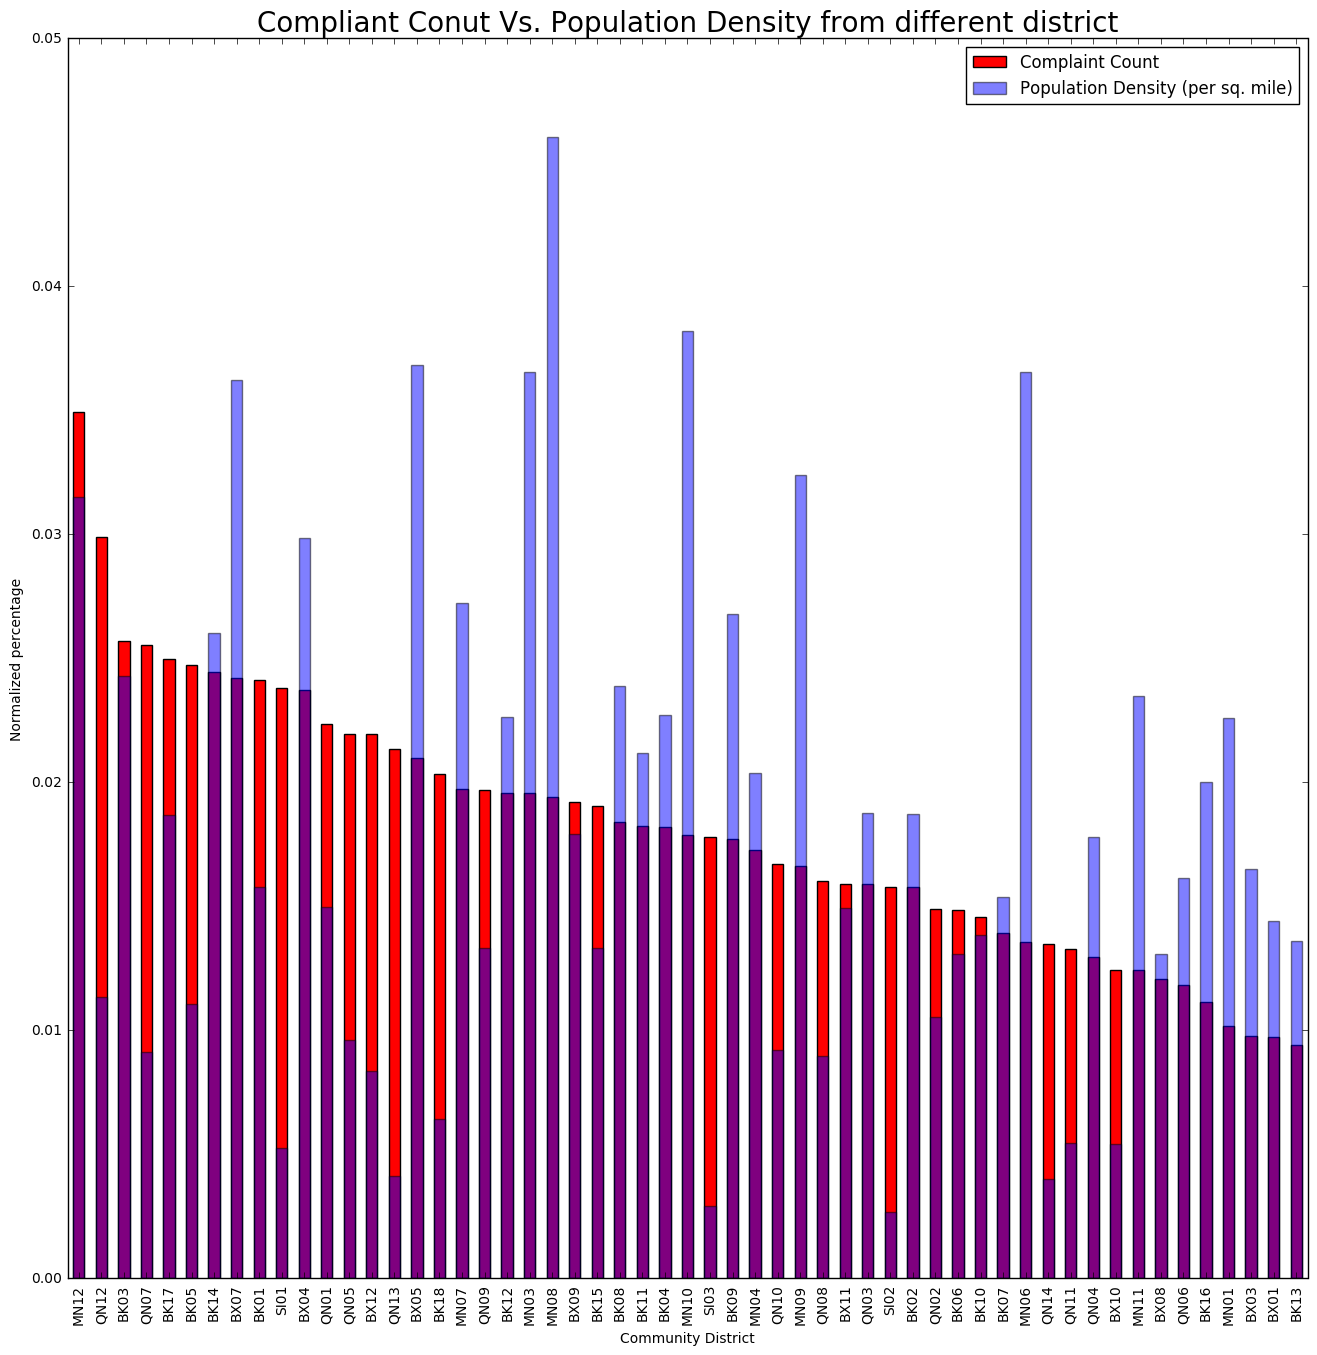

In [75]:
(final['Complaint Count'] / final['Complaint Count'].sum()).plot(kind = 'bar', color = 'red', figsize=(16, 16))
ax_1 = (final['Population Density (per sq. mile)'] / final['Population Density (per sq. mile)'].sum())\
.plot(kind = 'bar', color = 'blue', alpha = 0.5)

ax_1.xaxis.set_ticklabels(final['CM B'])
ax_1.set_ylabel('Normalized percentage')
ax_1.set_xlabel('Community District')
ax_1.set_title('Compliant Conut Vs. Population Density from different district',fontsize = 20)
ax_1.legend()

### Figure1: From the plot above we can see that for most of the districts, more density of population might link to a high percemtage of the complaint. 

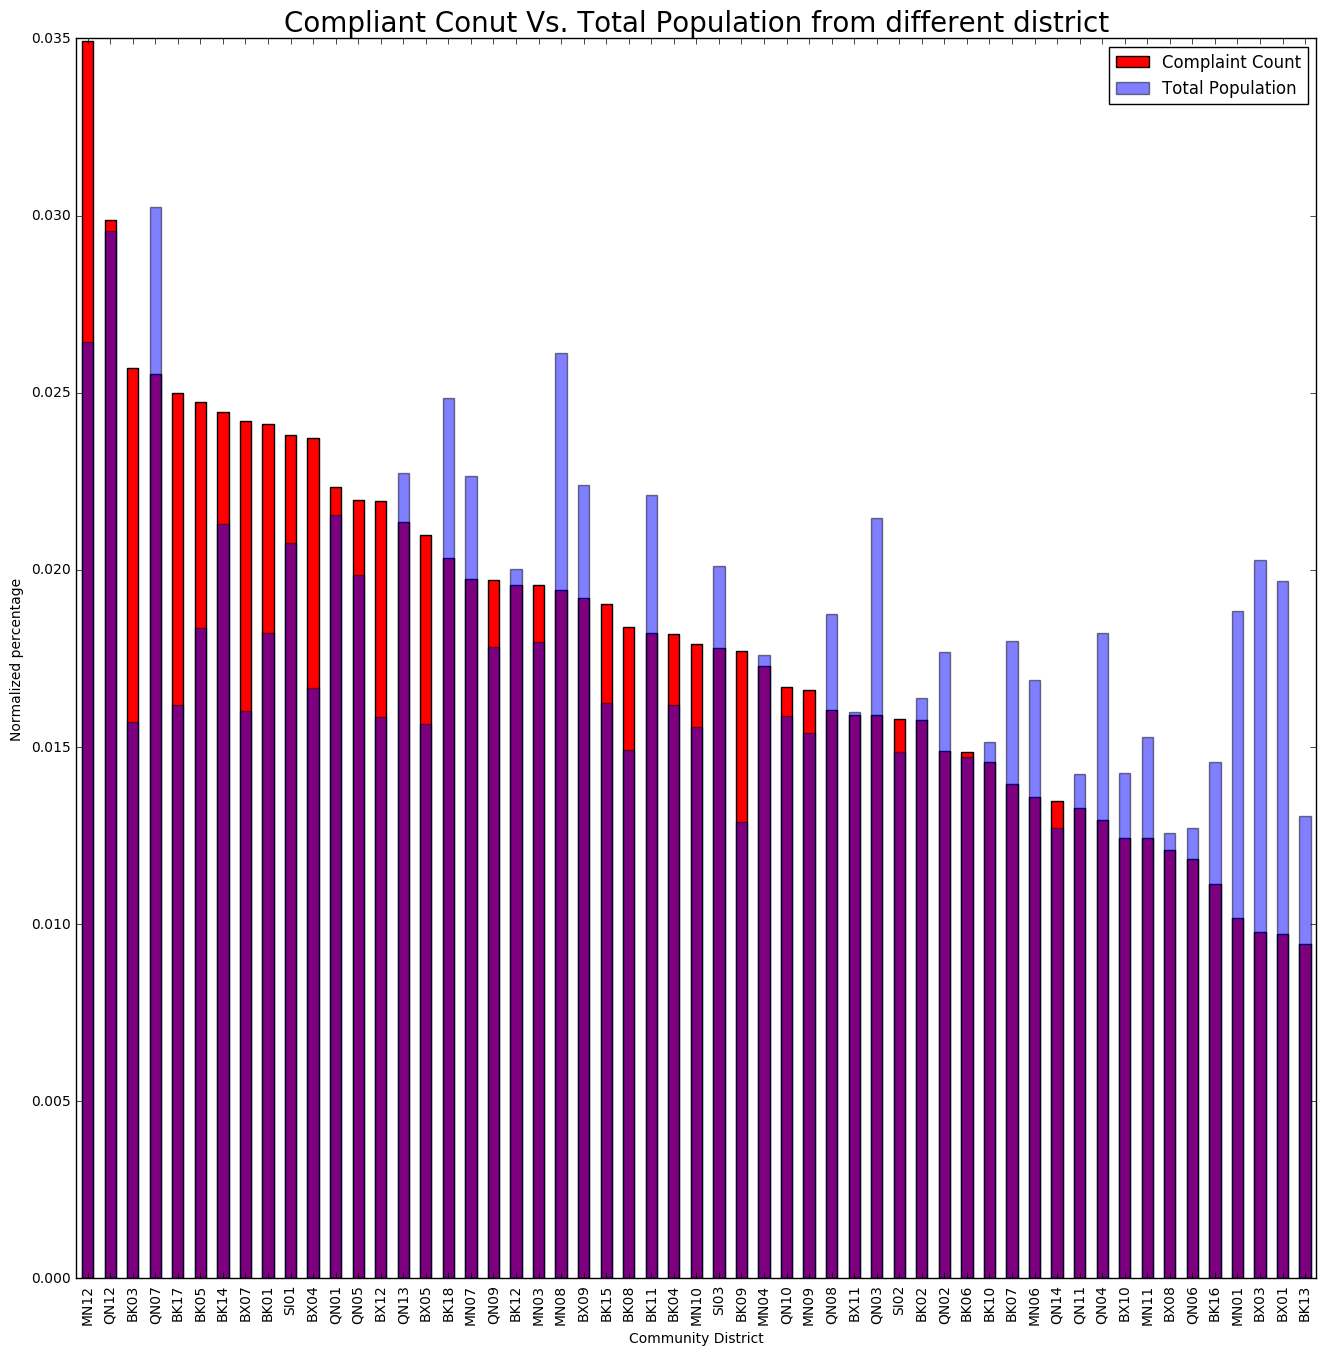

In [76]:

(final['Complaint Count'] / final['Complaint Count'].sum()).plot(kind = 'bar', color = 'red', figsize=(16, 16))
ax_2 = (final['Total Population'] / final['Total Population'].sum()).plot(kind = 'bar', color = 'blue', alpha =  0.5)

ax_2.xaxis.set_ticklabels(final['CM B'])
ax_2.set_ylabel('Normalized percentage')
ax_2.set_xlabel('Community District')
ax_2.set_title('Compliant Conut Vs. Total Population from different district',fontsize = 20)
ax_2.legend()


### Figure 2: From the plot above shows that the relationship between total population and complaint count is not cleat, afterall, large population might reslut from large district area. 

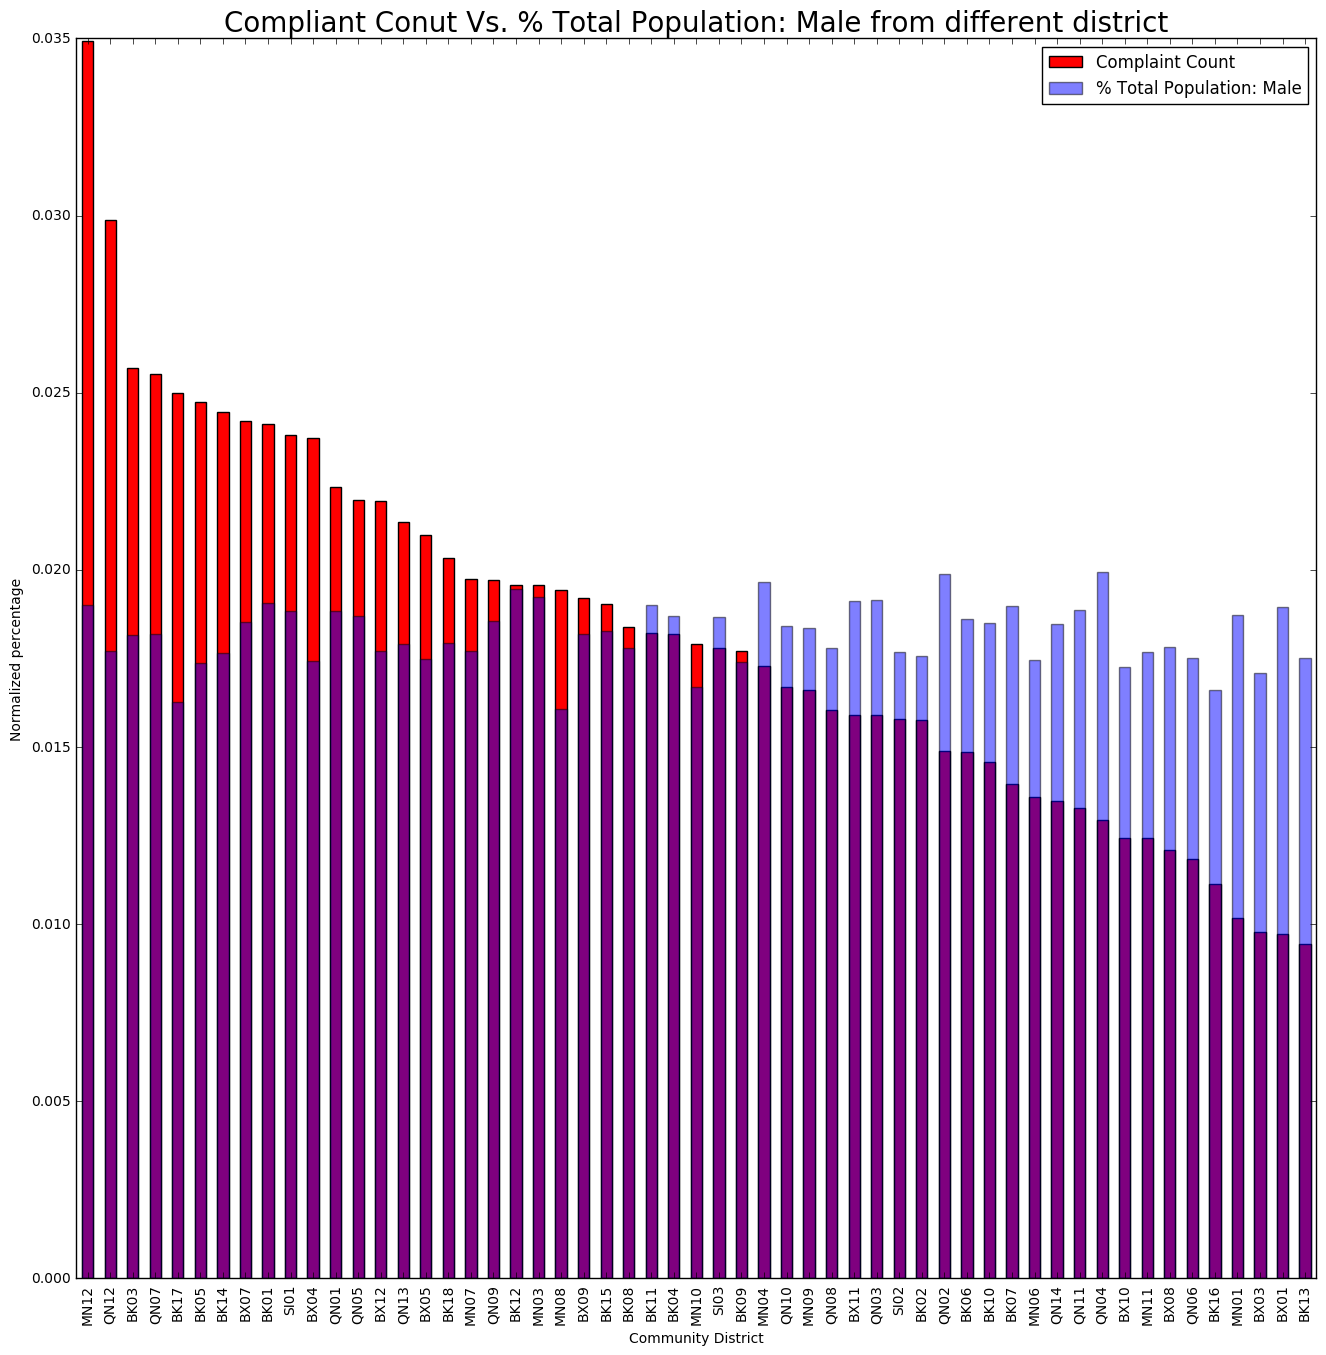

In [77]:
(final['Complaint Count'] / final['Complaint Count'].sum()).plot(kind = 'bar', color = 'red', figsize=(16, 16))
ax_3 = (final['% Total Population: Male'] / final['% Total Population: Male'].sum())\
.plot(kind = 'bar', color = 'blue', alpha =  0.5)

ax_3.xaxis.set_ticklabels(final['CM B'])
ax_3.set_ylabel('Normalized percentage')
ax_3.set_xlabel('Community District')
ax_3.set_title('Compliant Conut Vs. % Total Population: Male from different district',fontsize = 20)
ax_3.legend()


### Figure 3: This figure shows tha the % of male in the district has a rather stable trend which indicates weak relationship with complanit count.

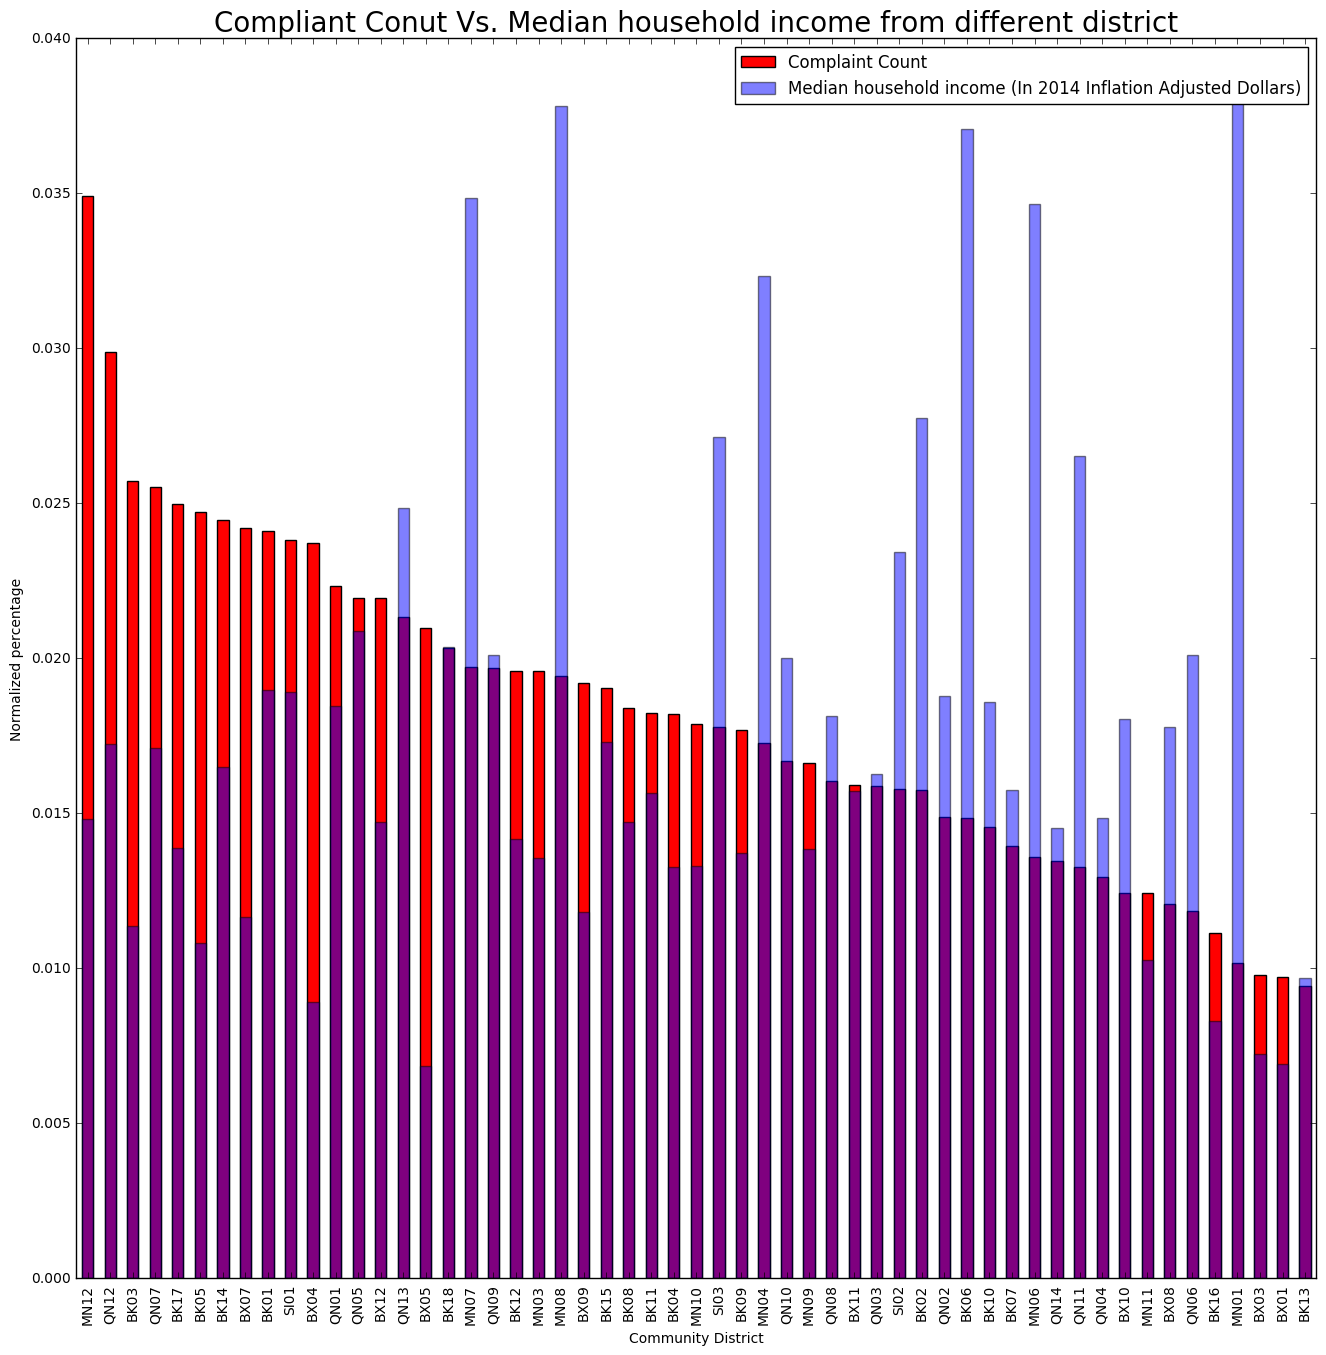

In [78]:
(final['Complaint Count'] / final['Complaint Count'].sum()).plot(kind = 'bar', color = 'red', figsize=(16, 16))
ax_4 = (final['Median household income (In 2014 Inflation Adjusted Dollars)'] / \
        final['Median household income (In 2014 Inflation Adjusted Dollars)'].sum())\
.plot(kind = 'bar', color = 'blue', alpha =  0.5)

ax_4.xaxis.set_ticklabels(final['CM B'])
ax_4.set_ylabel('Normalized percentage')
ax_4.set_xlabel('Community District')
ax_4.set_title('Compliant Conut Vs. Median household income from different district',fontsize = 20)
ax_4.legend()


### Figure 4: This figure also indicates low relationship between complaints count and household income.

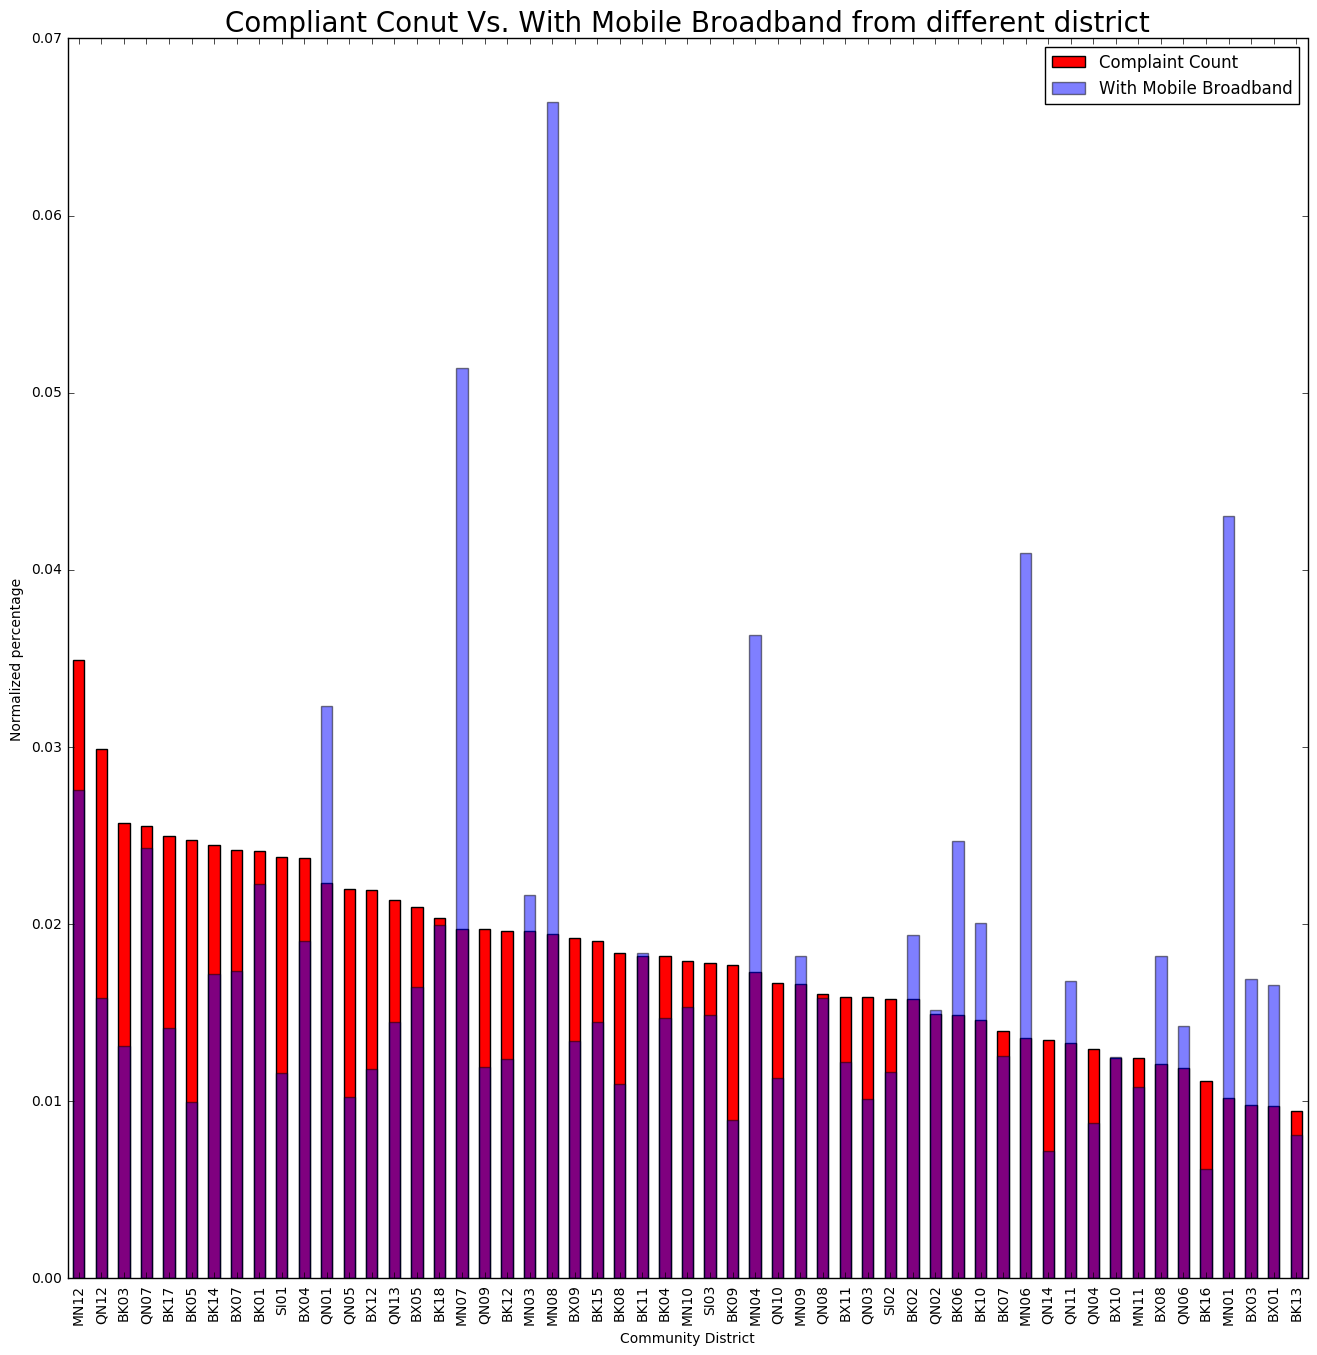

In [79]:
(final['Complaint Count'] / final['Complaint Count'].sum()).plot(kind = 'bar', color = 'red', figsize=(16, 16))
ax_5 = (final['With Mobile Broadband'] / final['With Mobile Broadband'].sum())\
.plot(kind = 'bar', color = 'blue', alpha =  0.5)

ax_5.xaxis.set_ticklabels(final['CM B'])
ax_5.set_ylabel('Normalized percentage')
ax_5.set_xlabel('Community District')
ax_5.set_title('Compliant Conut Vs. With Mobile Broadband from different district',fontsize = 20)
ax_5.legend()


### Figure 5: This figure indicates low correlation between complaints count and percentage of household with mobile broadband.

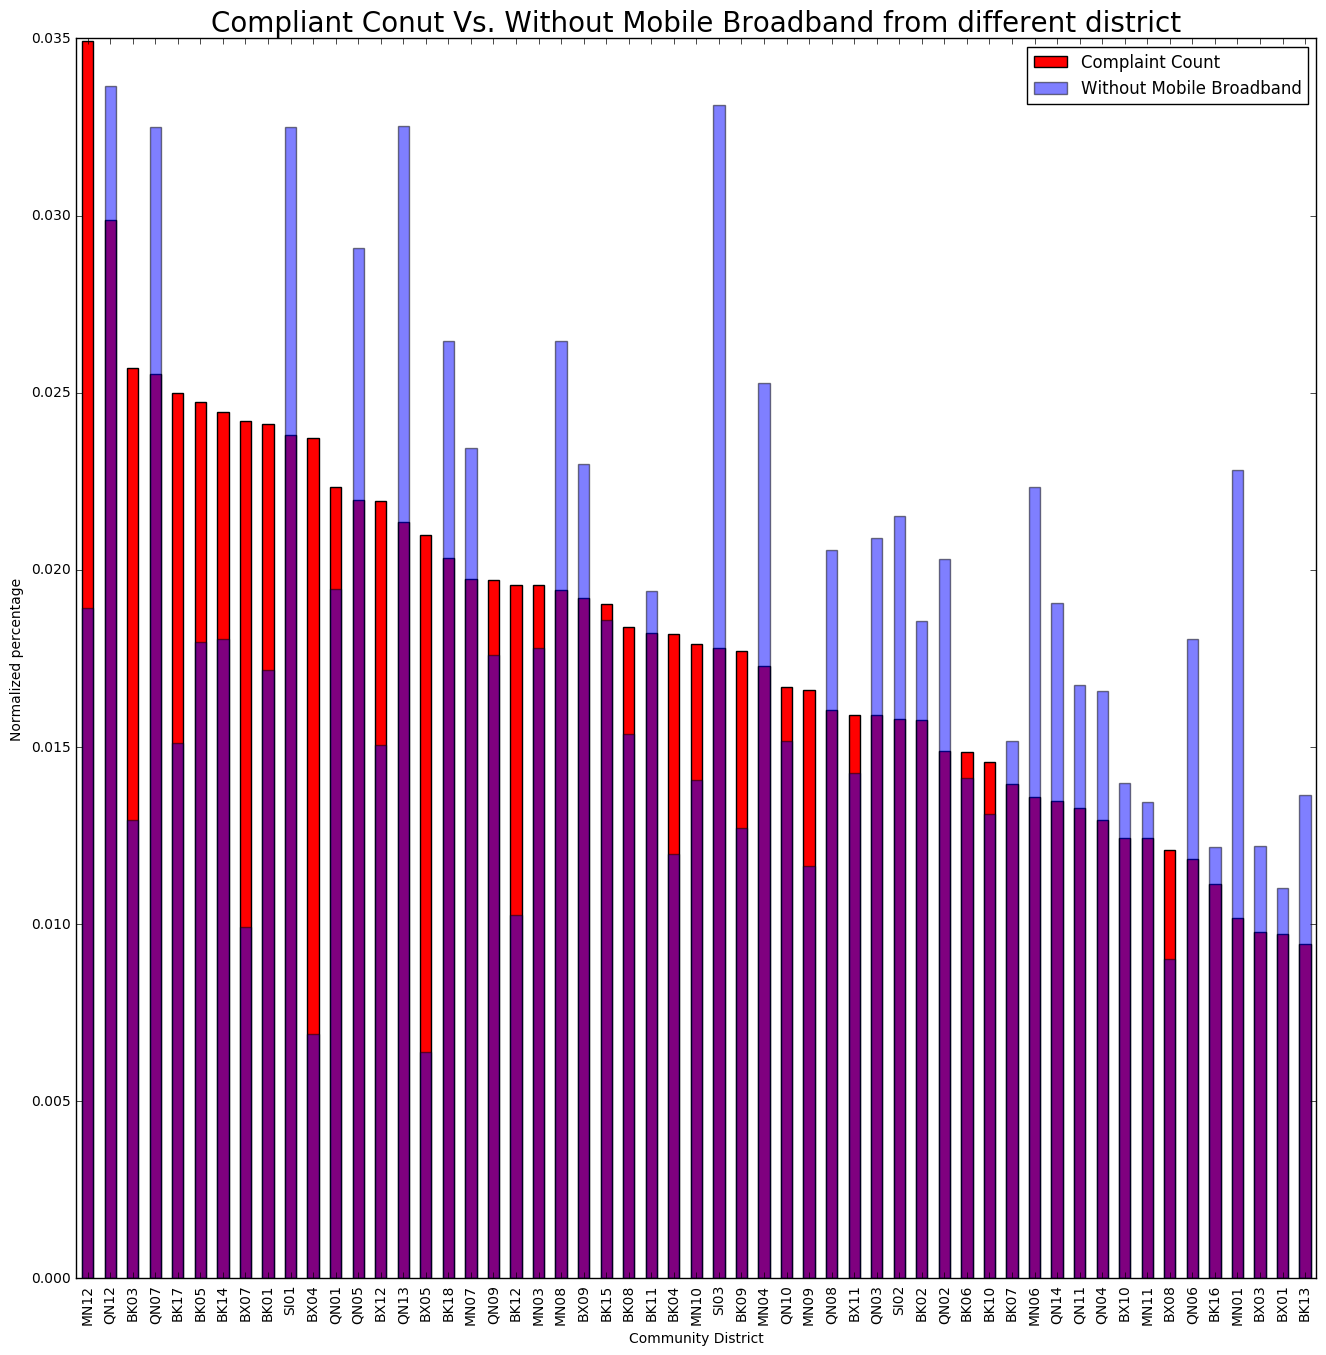

In [80]:
(final['Complaint Count'] / final['Complaint Count'].sum()).plot(kind = 'bar', color = 'red', figsize=(16, 16))
ax_6 = (final['Without Mobile Broadband'] / final['Without Mobile Broadband'].sum())\
.plot(kind = 'bar', color = 'blue', alpha =  0.5)

ax_6.xaxis.set_ticklabels(final['CM B'])
ax_6.set_ylabel('Normalized percentage')
ax_6.set_xlabel('Community District')
ax_6.set_title('Compliant Conut Vs. Without Mobile Broadband from different district',fontsize = 20)
ax_6.legend()


### Figure 6: This figure indicates low correlation between complaints count and percentage of household without mobile broadband.

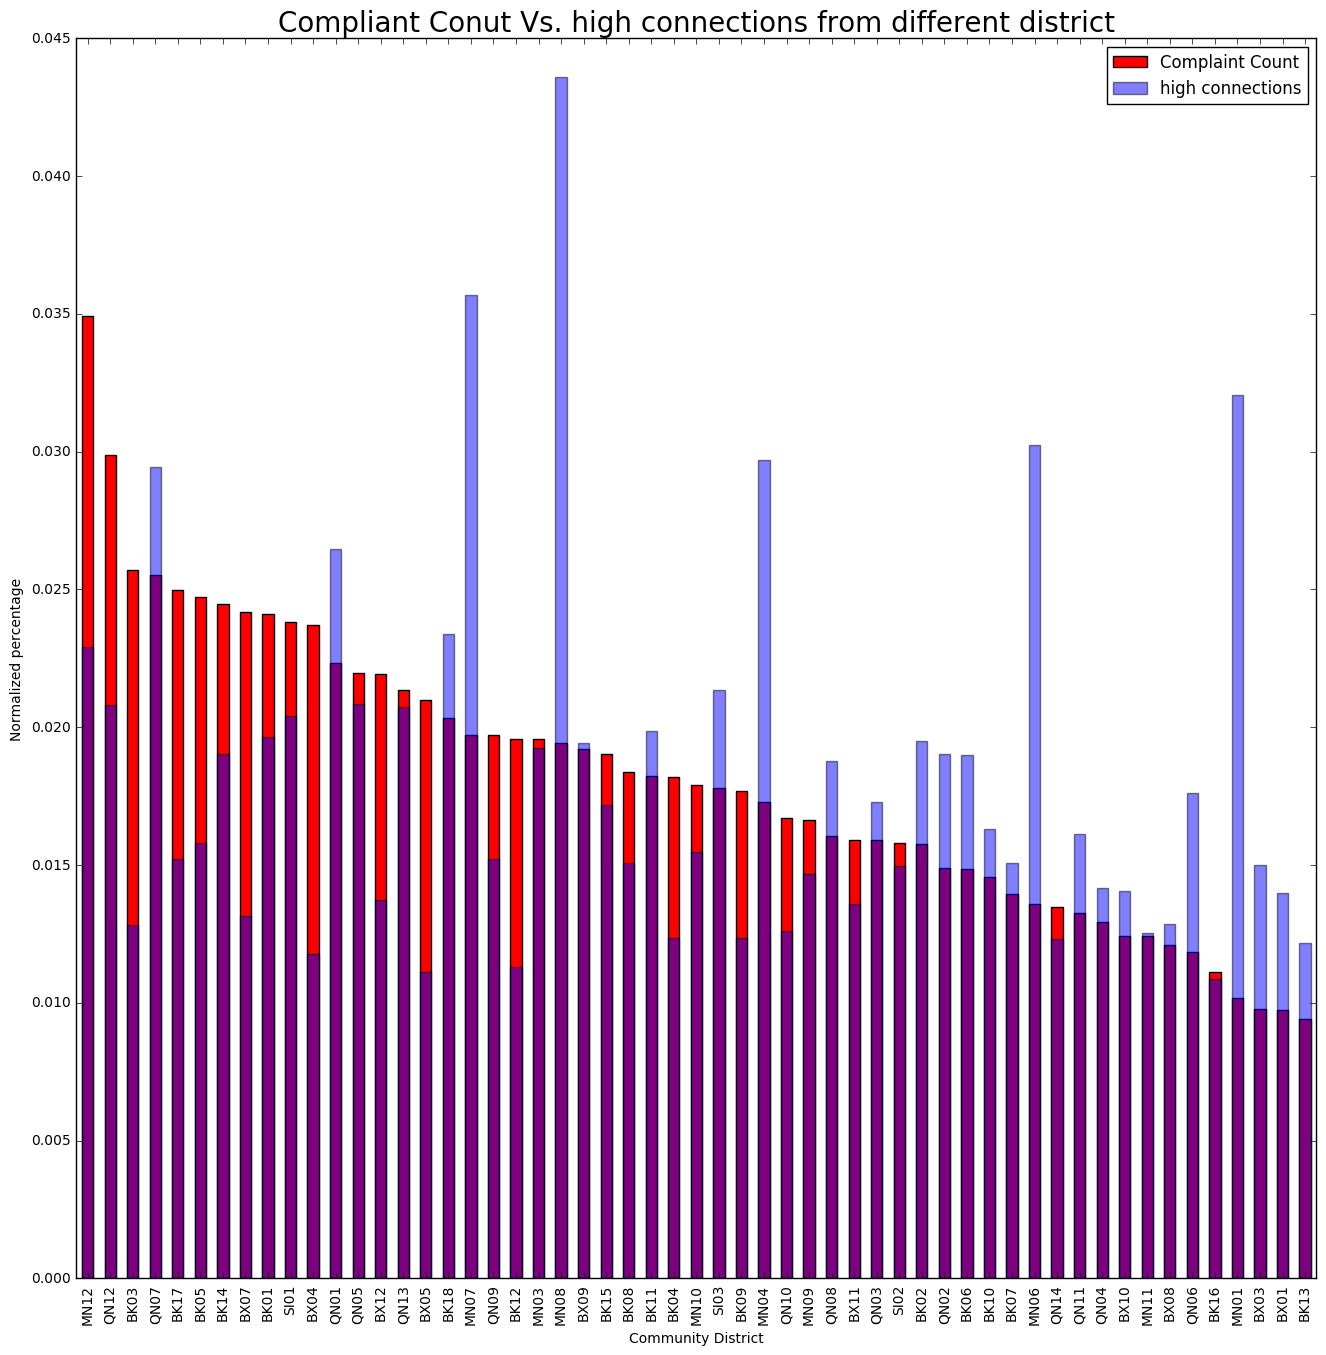

In [81]:
(final['Complaint Count'] / final['Complaint Count'].sum()).plot(kind = 'bar', color = 'red', figsize=(16, 16))
ax_7 = (final['high connections'] / final['high connections'].sum())\
.plot(kind = 'bar', color = 'blue', alpha =  0.5)

ax_7.xaxis.set_ticklabels(final['CM B'])
ax_7.set_ylabel('Normalized percentage')
ax_7.set_xlabel('Community District')
ax_7.set_title('Compliant Conut Vs. high connections from different district',fontsize = 20)
ax_7.legend()


### Figure 7: This figure indicates low correlation between complaints count and high internet connection.

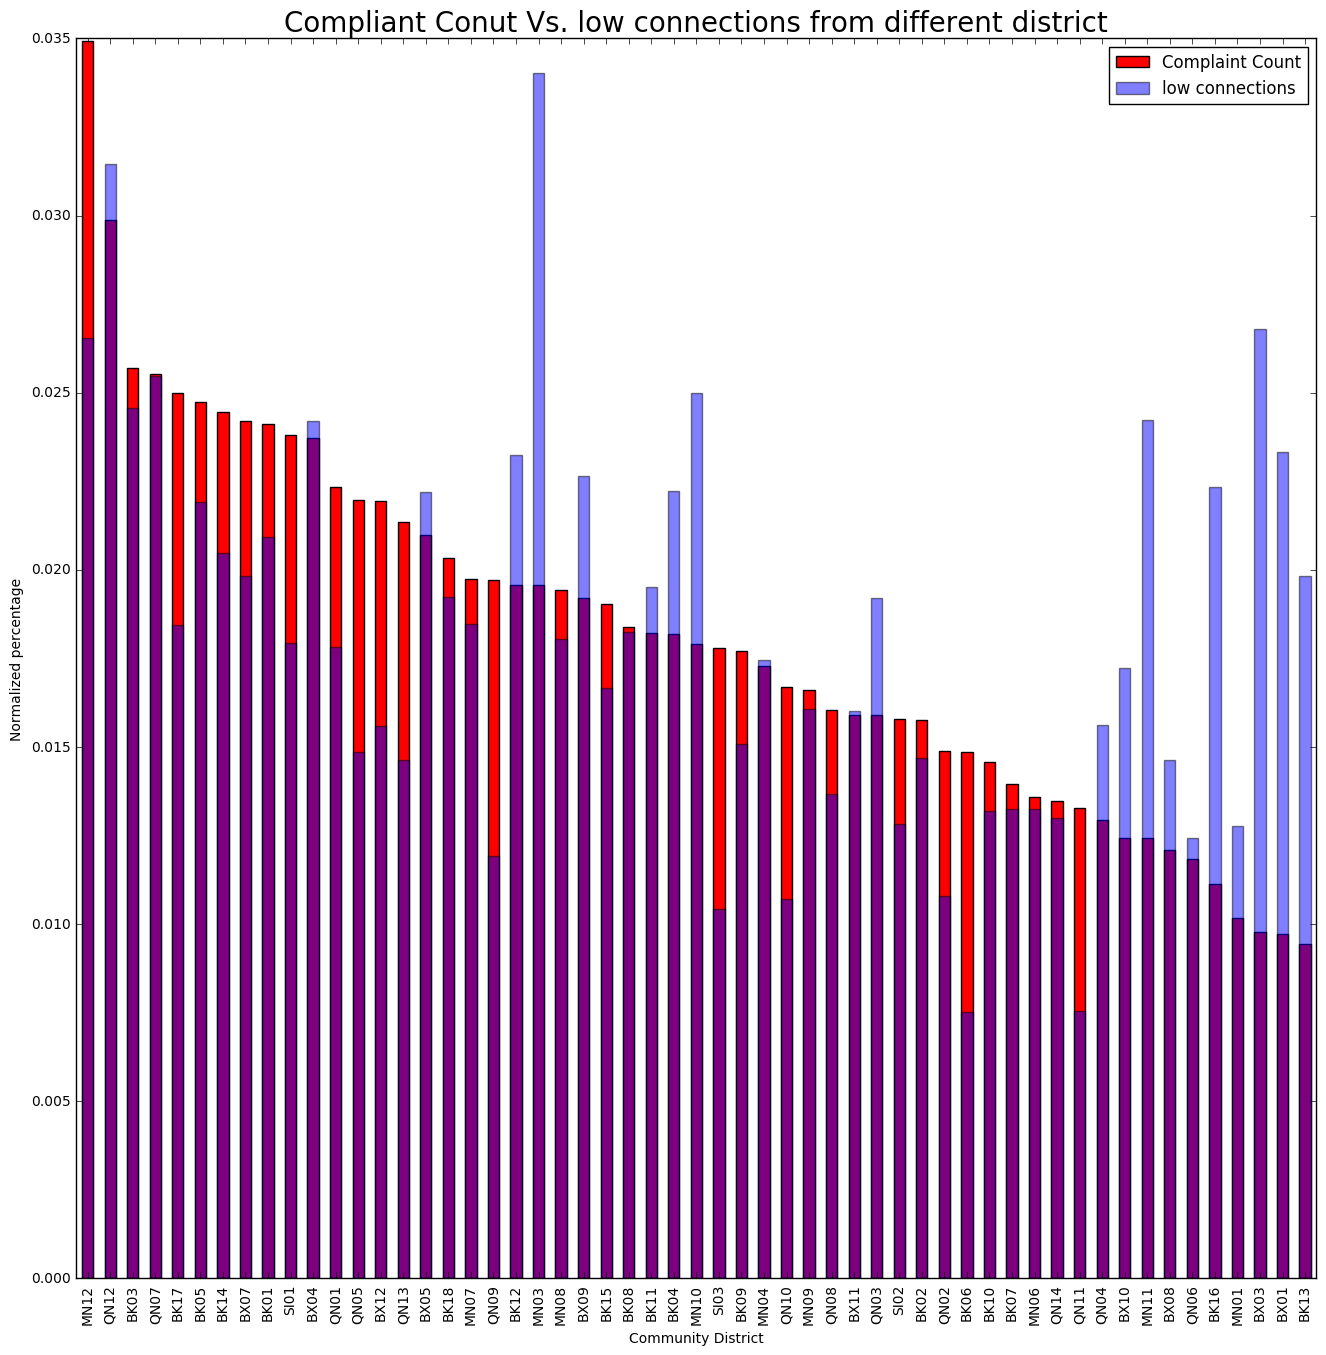

In [82]:
(final['Complaint Count'] / final['Complaint Count'].sum()).plot(kind = 'bar', color = 'red', figsize=(16, 16))
ax_7 = (final['low connections'] / final['low connections'].sum())\
.plot(kind = 'bar', color = 'blue', alpha =  0.5)

ax_7.xaxis.set_ticklabels(final['CM B'])
ax_7.set_ylabel('Normalized percentage')
ax_7.set_xlabel('Community District')
ax_7.set_title('Compliant Conut Vs. low connections from different district',fontsize = 20)
ax_7.legend()


### Figure 8:  This figure indicates low correlation between complaints count and low internet connection.¶